In [1]:
corpus = [
    "我特别特别喜欢看电影",
    "这部电影真的是很好看的电影",
    "今天天气真好是难得的好天气",
    "我今天去看了一部电影",
    "电影院的电影都很好看"
]

In [2]:
import jieba

corpus_tokenized = [list(jieba.cut(sentence)) for sentence in corpus]

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/14/y2y48zlx0mv9s5p_x9rlq2q40000gn/T/jieba.cache
Loading model cost 0.490 seconds.
Prefix dict has been built successfully.


In [3]:
corpus_tokenized

[['我', '特别', '特别', '喜欢', '看', '电影'],
 ['这部', '电影', '真的', '是', '很', '好看', '的', '电影'],
 ['今天天气', '真好', '是', '难得', '的', '好', '天气'],
 ['我', '今天', '去', '看', '了', '一部', '电影'],
 ['电影院', '的', '电影', '都', '很', '好看']]

In [5]:
word_dict = {}
for sentence in corpus_tokenized:
    for word in sentence:
        if word not in word_dict:
            word_dict[word] = len(word_dict)
print(word_dict)

{'我': 0, '特别': 1, '喜欢': 2, '看': 3, '电影': 4, '这部': 5, '真的': 6, '是': 7, '很': 8, '好看': 9, '的': 10, '今天天气': 11, '真好': 12, '难得': 13, '好': 14, '天气': 15, '今天': 16, '去': 17, '了': 18, '一部': 19, '电影院': 20, '都': 21}


In [6]:
bow_vectors = []
for sentence in corpus_tokenized:
    sentence_vec = [0] * len(word_dict)
    for word in sentence:
        sentence_vec[word_dict[word]] += 1
    bow_vectors.append(sentence_vec)
    
print(bow_vectors)

[[1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]]


In [8]:
import numpy as np

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

In [13]:
similarity_mat = np.zeros((len(corpus), len(corpus)))
for i in range(len(corpus)):
    for j in range(len(corpus)):
        similarity_mat[i][j] = cosine_similarity(bow_vectors[i], bow_vectors[j])

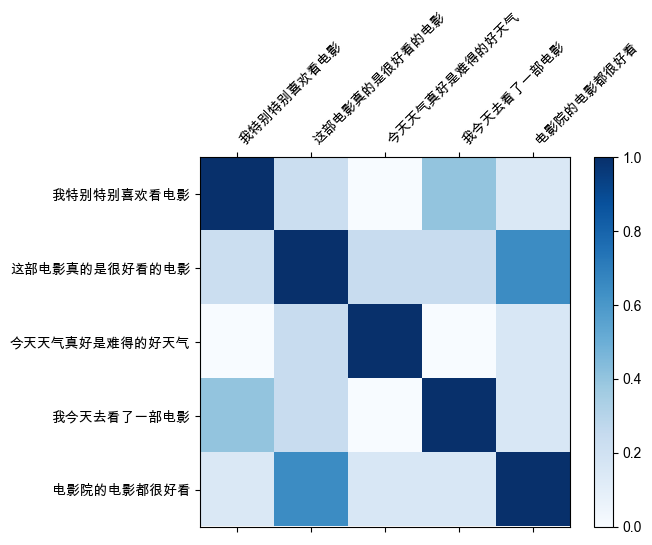

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = ["Arial Unicode MS"]
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]
plt.rcParams["axes.unicode_minus"] = False

fig, ax = plt.subplots()
cax = ax.matshow(similarity_mat, cmap=plt.cm.Blues) 
fig.colorbar(cax)
ax.set_xticks(range(len(corpus)))
ax.set_yticks(range(len(corpus)))
ax.set_xticklabels(corpus, rotation=45, ha='left')
ax.set_yticklabels(corpus)  
plt.show()